# 泰坦尼克号幸存者的预测

## 1.导入所需要的库

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 2.导入数据集，探索数据

In [21]:
data = pd.read_csv("C:\MyCode\Sklearn\DecisionTree\data.csv")
data.info()
data.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

## 3.对数据集进行预处理

In [22]:
# 删除缺失值过多的行，删除与预测的结果无关的值
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [23]:
# 处理缺失值，对缺失值进行填补
data["Age"] = data["Age"].fillna(data["Age"].mean())
# data.info()
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [25]:
# 将二分类变量转换为数值型变量
data["Sex"] = (data["Sex"] == "male").astype("int")
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [29]:
# 将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
data.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,1,35.000000,0,0,8.0500,0
5,6,0,3,1,29.699118,0,0,8.4583,2
6,7,0,1,1,54.000000,0,0,51.8625,0
7,8,0,3,1,2.000000,3,1,21.0750,0
8,9,1,3,0,27.000000,0,2,11.1333,0
9,10,1,2,0,14.000000,1,0,30.0708,1


## 4.提取标签和特征矩阵，分测试集和训练集

In [41]:
# Survived为是否存活，是标签.提取标签和特征矩阵
x = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size = 0.3)
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
# 查看分好的数据集
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,137,1,0,19.000000,0,2,26.2833,0
1,719,3,1,29.699118,0,0,15.5000,2
2,742,1,1,36.000000,1,0,78.8500,0
3,380,3,1,19.000000,0,0,7.7750,0
4,406,2,1,34.000000,1,0,21.0000,0
...,...,...,...,...,...,...,...,...
618,31,1,1,40.000000,0,0,27.7208,1
619,176,3,1,18.000000,1,1,7.8542,0
620,559,1,0,39.000000,1,1,79.6500,0
621,9,3,0,27.000000,0,2,11.1333,0


## 5.导入模型，粗略跑一下查看结果

In [44]:
# 用7:3的数据进行验证
clf = DecisionTreeClassifier(random_state = 25)
clf = clf.fit(Xtrain,Ytrain)
score_ = clf.score(Xtest,Ytest)
score_

0.7947761194029851

In [45]:
# 使用交叉验证
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7464294631710362

## 6.在不同max_depth下观察模型的拟合情况

0.8170536828963796


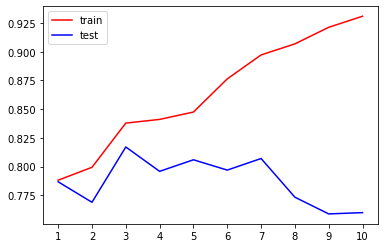

In [49]:
# 存储训练集和测试集10次拟合结果的数组
tr = []
te = []

# 对树的深度进行循环
for i in range(10):
    clf = DecisionTreeClassifier(random_state = 25
                                 ,max_depth = i + 1
                                 ,criterion = "entropy"
    
    )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
print(max(te))

# 画图
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

## 7.用网格搜索调整参数

In [51]:
gini_thresholds = np.linspace(0,0.5,20)

parameters = {
    "splitter":("best","random")
    ,"criterion":("gini","entropy")
    ,"max_depth":[*range(1,10)]
    ,"min_samples_leaf":[*range(1,50,5)]
    ,"min_impurity_decrease":[*np.linspace(0,0.5,20)]
}

clf = DecisionTreeClassifier(random_state = 25)
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
        

In [52]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'random'}

In [53]:
GS.best_score_

0.8204301075268818